In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier




data = pd.read_csv('online_shoppers_intention1.csv')
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


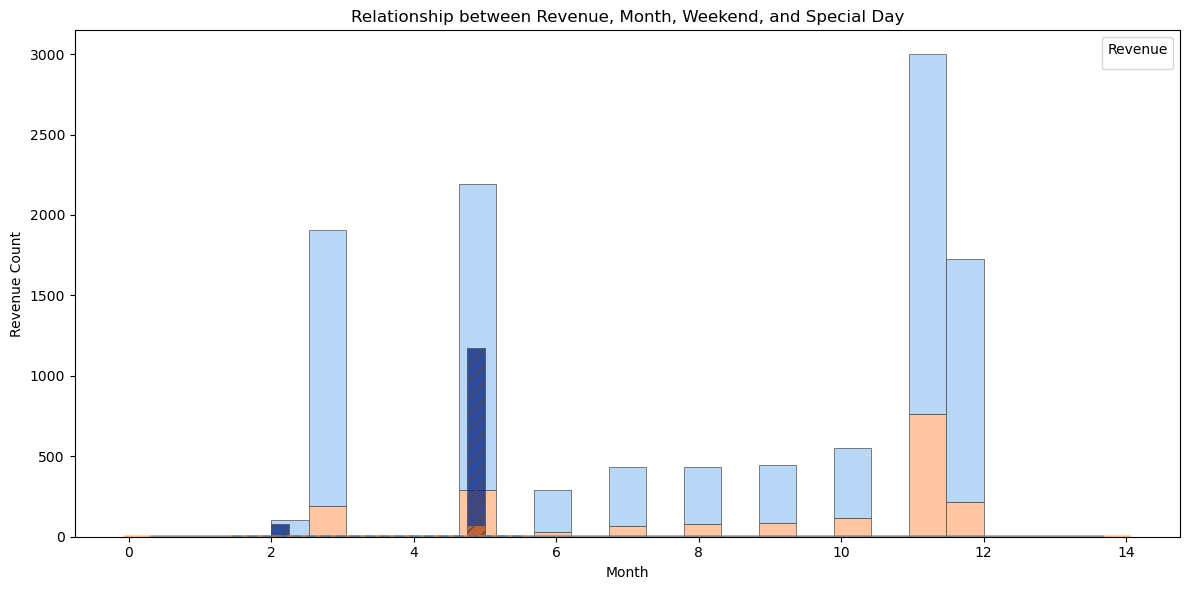

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('online_shoppers_intention1.csv')
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))


# Ensure that 'Month' is mapped to numerical values if it's not already
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['Month'] = data['Month'].map(month_mapping)

# Plot a bar chart with density curves for Revenue by Month and Weekend
plt.figure(figsize=(12, 6))
# Create a bar plot for non-special days
sns.histplot(data=data[data['SpecialDay'] == 0], x='Month', hue='Revenue', multiple='stack', palette='pastel', edgecolor=".3", linewidth=.5)
# Add density plots for non-special days
sns.kdeplot(data=data[data['SpecialDay'] == 0], x='Month', hue='Revenue', common_norm=False, alpha=0.5, linewidth=2)

# Add bar and density plots for special days in a different style or color
sns.histplot(data=data[data['SpecialDay'] != 0], x='Month', hue='Revenue', multiple='stack', palette='dark', edgecolor=".3", linewidth=.5, hatch='//')

# Add density plots for special days
sns.kdeplot(data=data[data['SpecialDay'] != 0], x='Month', hue='Revenue', common_norm=False, alpha=0.5, linewidth=2, linestyle='--')

plt.title('Relationship between Revenue, Month, Weekend, and Special Day')
plt.xlabel('Month')
plt.ylabel('Revenue Count')
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()


/Users/gabrielmancillas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


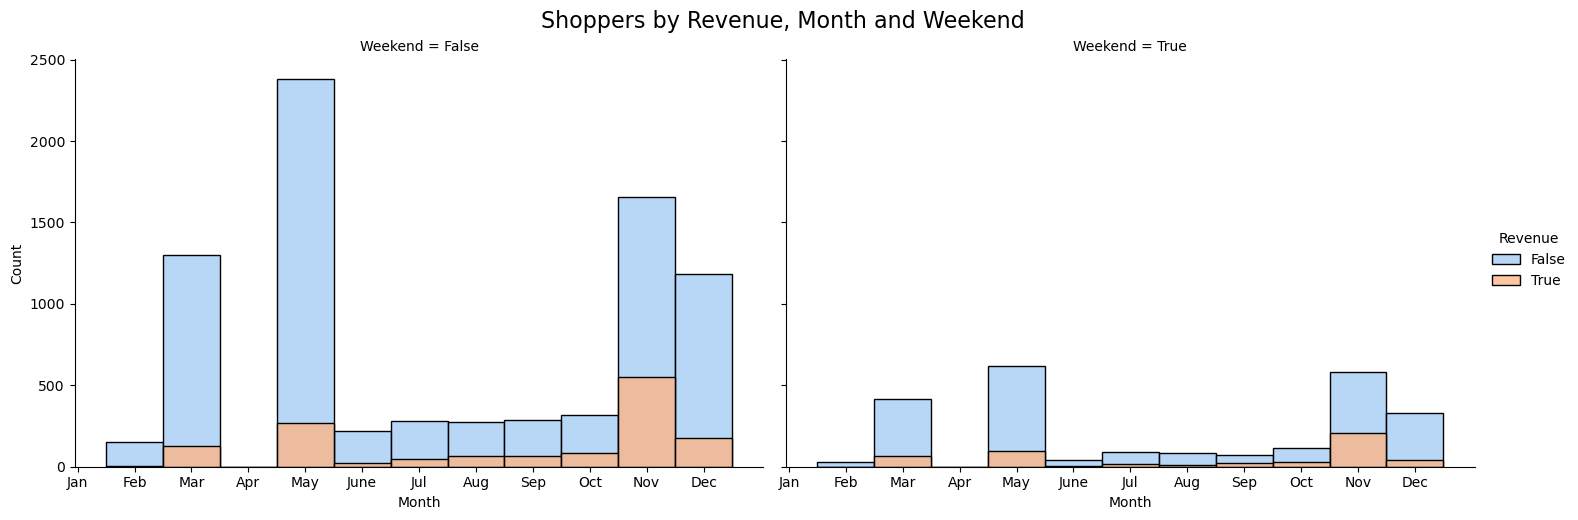

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('online_shoppers_intention1.csv')
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

# Assuming 'Month' is a string, we'll convert it to a categorical type with order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Now we can create the FacetGrid plot
g = sns.FacetGrid(data, col="Weekend", hue="Revenue", height=5, aspect=1.5, palette="pastel")

# We use `sns.histplot` with `discrete=True` for categorical data
g.map(sns.histplot, "Month", discrete=True, kde=False, stat="count")

# Since seaborn doesn't support KDE plots for categorical data, we won't add a density plot
# If you still want the density plots, you'll need to convert 'Month' to numeric as before

# Add the legend and titles
g.add_legend(title='Revenue')
g.set_axis_labels("Month", "Count")
g.fig.suptitle('Shoppers by Revenue, Month and Weekend', fontsize=16, y=1.03)

# Display the plot
plt.show()

Chi-squared test p-value: 4.269904152293867e-30
There is a significant association between visitor type and revenue generation.


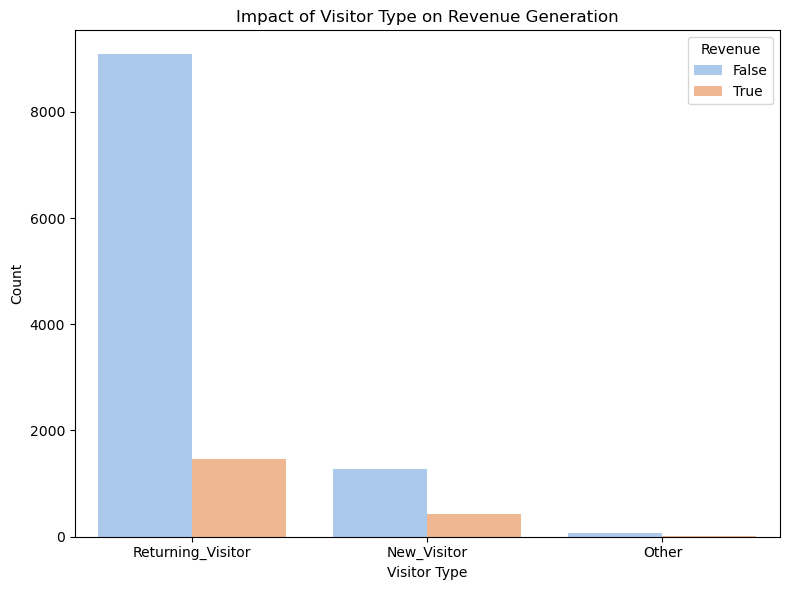

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

# Create a contingency table
contingency_table = pd.crosstab(data['VisitorType'], data['Revenue'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print('Chi-squared test p-value:', p)

# Interpret the p-value
if p < 0.05:
    print('There is a significant association between visitor type and revenue generation.')
else:
    print('There is no significant association between visitor type and revenue generation.')

# Create a bar plot to visualize the counts of revenue generation by visitor type
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', hue='Revenue', data=data, palette='pastel')
plt.title('Impact of Visitor Type on Revenue Generation')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0


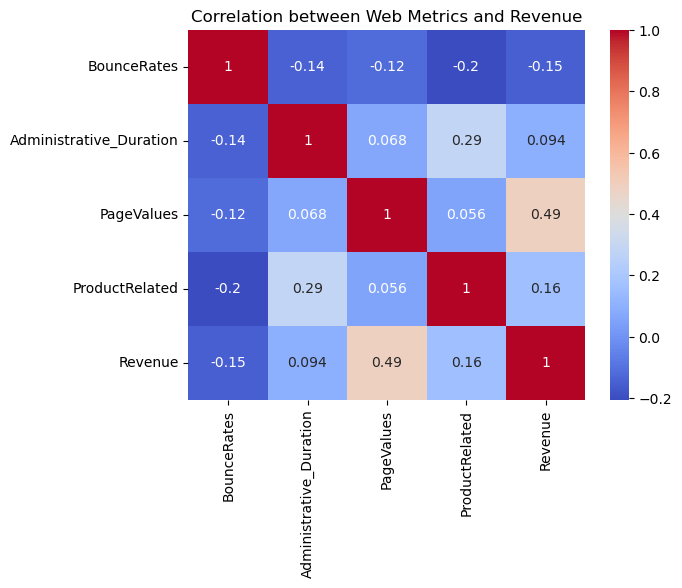

Optimization terminated successfully.
         Current function value: 0.306159
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12325
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Nov 2023   Pseudo R-squ.:                  0.2894
Time:                        14:40:23   Log-Likelihood:                -3774.9
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BounceRates               -20.3712      2.341     -8.703      0.000     -24.959   

In [19]:
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))


# Check for any infinite or NaN values in the dataset
print(data.isin([np.inf, -np.inf]).sum())  # Check for infinite values
print(data.isnull().sum())  # Check for missing (NaN) values

# Replace inf values with NaN so they can be handled uniformly
data = data.replace([np.inf, -np.inf], np.nan)

# One common approach is to fill NaN values with the mean or median of the column
# This is a simple imputation method. There are more sophisticated methods available.
data['BounceRates'] = data['BounceRates'].fillna(data['BounceRates'].median())
data['Administrative_Duration'] = data['Administrative_Duration'].fillna(data['Administrative_Duration'].median())
data['PageValues'] = data['PageValues'].fillna(data['PageValues'].median())
data['ProductRelated'] = data['ProductRelated'].fillna(data['ProductRelated'].median())


# Check the correlation between web metrics and revenue
# First, encode Revenue as 0 and 1.
data['Revenue'] = data['Revenue'].astype(int)

# Calculate the correlation matrix
correlation_matrix = data[['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated', 'Revenue']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlations with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Web Metrics and Revenue')
plt.show()

# Logistic Regression
# Add a constant to the model (it's a requirement for statsmodels' sm.Logit function)
data['intercept'] = 1.0

# Define the independent variables (web metrics) and the dependent variable (Revenue)
independent_vars = ['BounceRates', 'Administrative_Duration', 'PageValues', 'ProductRelated', 'intercept']
X = data[independent_vars]
y = data['Revenue']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the logistic regression summary
print(result.summary())

<Figure size 1200x800 with 0 Axes>

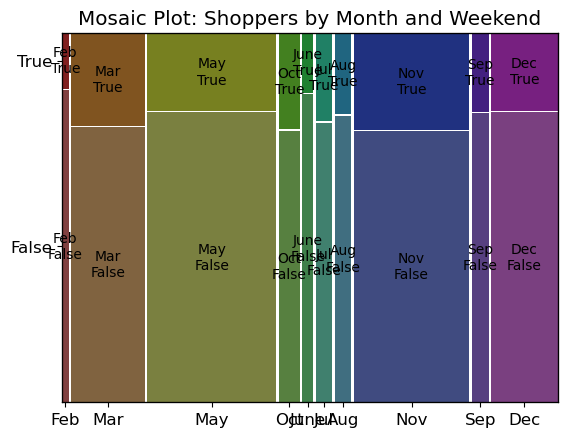

In [32]:
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

crosstab = pd.crosstab(data['Month'], data['Weekend'])

# Perform Chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(crosstab)

# Calculate the standardized residuals
residuals = (crosstab - expected) / np.sqrt(expected)

# Flatten the residuals and store them in a dictionary with a tuple (Month, Weekend) as keys
residuals_dict = residuals.unstack().to_dict()

# Define a function to map the residuals to colors
def resid_to_color(resid):
    if resid > 2:    # Significantly more than expected
        return 'red'
    elif resid < -2: # Significantly less than expected
        return 'blue'
    else:            # Not significantly different from expected
        return 'grey'

# Map the residuals to colors and store in a property dictionary
props = {(month, weekend): {'color': resid_to_color(resid)} 
         for (month, weekend), resid in residuals_dict.items()}

# Create the mosaic plot with the properties dictionary
plt.figure(figsize=(12, 8))
mosaic(data, ['Month', 'Weekend'], properties=props, title='Mosaic Plot: Shoppers by Month and Weekend')
plt.show()